In [1]:
#weather_features.py imports
from typing import List

import numpy as np
import pandas as pd


## pvlib tutorial
https://pvlib-python.readthedocs.io/en/v0.9.0/introtutorial.html

https://pvlib-python.readthedocs.io/en/v0.6.3/generated/pvlib.irradiance.gti_dirint.html?highlight=GTI#pvlib.irradiance.gti_dirint

In [3]:
import pvlib

import pandas as pd

import matplotlib.pyplot as plt

In [4]:
# latitude, longitude, name, altitude, timezone

coordinates = [

    (32.2, -111.0, 'Tucson', 700, 'Etc/GMT+7'),

    (35.1, -106.6, 'Albuquerque', 1500, 'Etc/GMT+7'),

    (37.8, -122.4, 'San Francisco', 10, 'Etc/GMT+8'),

    (52.5, 13.4, 'Berlin', 34, 'Etc/GMT-1'),
]

In [5]:
# get the module and inverter specifications from SAM

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [6]:
tmys = []

for location in coordinates:
    try:

        latitude, longitude, name, altitude, timezone = location

        weather = pvlib.iotools.get_pvgis_tmy(latitude, longitude,

                                              map_variables=True)[0]

        weather.index.name = "utc_time"

        tmys.append(weather)
    except:
        pass
    
    


In [7]:
tmys

[]

In [8]:
# assumptions from https://pvlib-python.readthedocs.io/en/v0.9.0/auto_examples/plot_spectrl2_fig51A.html#sphx-glr-auto-examples-plot-spectrl2-fig51a-py
lat = 37
lon = -100
tilt = 37
azimuth = 180
pressure = 101300  # sea level, roughly
water_vapor_content = 0.5  # cm
tau500 = 0.1
ozone = 0.31  # atm-cm
albedo = 0.2

In [9]:
times = pd.date_range('2023-06-28 00:00', freq='5min', periods=1000, tz='Etc/GMT-2')
solpos = pvlib.solarposition.get_solarposition(times, lat, lon)

In [10]:
surface_tilt = tilt
surface_azimuth = azimuth
solar_zenith = solpos.apparent_zenith
solar_azimuth = solpos.azimuth

aoi = pvlib.irradiance.aoi(surface_tilt, surface_azimuth, solar_zenith, solar_azimuth)





Location: 
  name: Nijmegen
  latitude: 51
  longitude: 5
  altitude: 0
  tz: 2

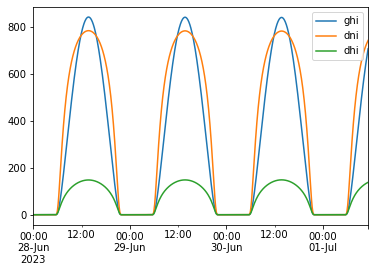

In [11]:
from pvlib.location import Location
lat = 51
lon = 5
loc = Location(lat, lon, 2, 0, 'Nijmegen')

cs = loc.get_clearsky(times)###################

cs.plot()
dni = cs.dni
loc

In [12]:
POA_irradiance = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=cs['dni'],
        ghi=cs['ghi'],
        dhi=cs['dhi'],
        solar_zenith=solpos['apparent_zenith'],
        solar_azimuth=solpos['azimuth'])
POA_irradiance

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2023-06-28 00:00:00+02:00,0.000000,0.0,0.000000,0.000000,0.000000
2023-06-28 00:05:00+02:00,0.000000,0.0,0.000000,0.000000,0.000000
2023-06-28 00:10:00+02:00,0.000000,0.0,0.000000,0.000000,0.000000
2023-06-28 00:15:00+02:00,0.000000,0.0,0.000000,0.000000,0.000000
2023-06-28 00:20:00+02:00,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
2023-07-01 10:55:00+02:00,138.472080,0.0,138.472080,121.572028,16.900052
2023-07-01 11:00:00+02:00,139.436044,0.0,139.436044,122.299830,17.136213
2023-07-01 11:05:00+02:00,140.370414,0.0,140.370414,123.003790,17.366624
2023-07-01 11:10:00+02:00,141.275323,0.0,141.275323,123.684160,17.591162


In [13]:


poa_global = POA_irradiance.poa_global

In [14]:
pvlib.irradiance.gti_dirint(poa_global, aoi, solar_zenith, solar_azimuth, times, surface_tilt, surface_azimuth, pressure=101325.0, use_delta_kt_prime=True, temp_dew=None, albedo=0.25, model='perez', model_perez='allsitescomposite1990', calculate_gt_90=True, max_iterations=30)

C:\Users\al25801\Miniconda3\envs\openstef\lib\site-packages\pvlib\irradiance.py:2048: RuntimeWarning: 255 points failed to converge after 30 iterations. best_diff:
2023-06-28 00:00:00+02:00    9999.0
2023-06-28 00:05:00+02:00    9999.0
2023-06-28 00:10:00+02:00    9999.0
2023-06-28 00:15:00+02:00    9999.0
2023-06-28 00:20:00+02:00    9999.0
                              ...  
2023-07-01 02:20:00+02:00    9999.0
2023-07-01 02:25:00+02:00    9999.0
2023-07-01 02:30:00+02:00    9999.0
2023-07-01 02:35:00+02:00    9999.0
2023-07-01 02:40:00+02:00    9999.0
Name: poa_global, Length: 255, dtype: float64
  warnings.warn(


,ghi,dni,dhi
2023-06-28 00:00:00+02:00,0.0,0.0,0.0
2023-06-28 00:05:00+02:00,0.0,0.0,0.0
2023-06-28 00:10:00+02:00,0.0,0.0,0.0
2023-06-28 00:15:00+02:00,0.0,0.0,0.0
2023-06-28 00:20:00+02:00,0.0,0.0,0.0
...,...,...,...
2023-07-01 10:55:00+02:00,NaN,NaN,NaN
2023-07-01 11:00:00+02:00,NaN,NaN,NaN
2023-07-01 11:05:00+02:00,NaN,NaN,NaN
2023-07-01 11:10:00+02:00,NaN,NaN,NaN


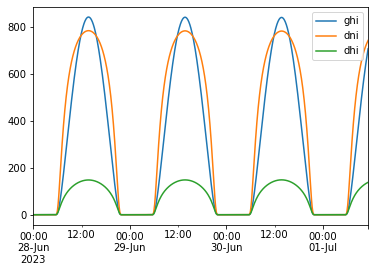

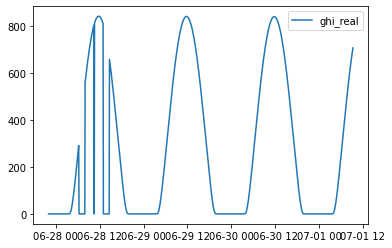

In [16]:
ghi = cs.ghi.copy()
ghi[50:70]=0
ghi[100:120]=0
ghi[150]=0
ghi[180:200]=0
cs.plot()
plt.show()
plt.plot(ghi,label='ghi_real')
plt.legend()
plt.show()


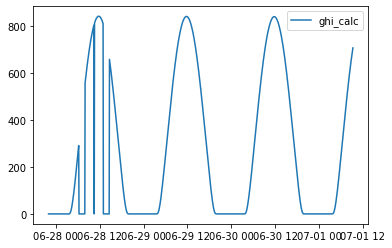

In [17]:
plt.plot(ghi,label='ghi_calc')
plt.legend()
plt.show()

In [18]:
cs2 = cs.copy()
cs2['ghi'] = ghi
#pvlib.clearsky.detect_clearsky(ghi,cs2,times,20)

In [19]:
cs2

,ghi,dni,dhi
2023-06-28 00:00:00+02:00,0.000000,0.000000,0.000000
2023-06-28 00:05:00+02:00,0.000000,0.000000,0.000000
2023-06-28 00:10:00+02:00,0.000000,0.000000,0.000000
2023-06-28 00:15:00+02:00,0.000000,0.000000,0.000000
2023-06-28 00:20:00+02:00,0.000000,0.000000,0.000000
...,...,...,...
2023-07-01 10:55:00+02:00,671.421329,730.628285,135.182506
2023-07-01 11:00:00+02:00,680.803781,733.937890,135.991789
2023-07-01 11:05:00+02:00,689.957756,737.108573,136.774560
2023-07-01 11:10:00+02:00,698.878434,740.144503,137.531100


# Make script that converts radiation (GHI) to DNI.


In [34]:
# make dataframe with radiation column (snippit of a day)
#2020-06-09 23:45:00+00:00

ghi =[81000,
    74700,
    68400,
    62700,
    57000,
    51300,
    45600,
    39900,
    34200,
    28500,
    22800,
    17100,
    11400,
    5700,
    0,
    18300,
    36600,
    54900,
    73200,
    91500,
    109800,
    128100,
    146400,
    164700,
    183000,
    201300,
    219600,
    321300,
    423000,
    524700,
    626400,
    728100,
    829800,
    931500,
    1033200,
    1134900,
    1236600,
    1338300,
    1440000,
    1320000,
    1200000,
    1080000,
    960000,
    840000,
    720000,
    600000,
    480000,
    360000,
    240000,
    120000,
    0,
    153000,
    306000,
    459000,
    612000,
    765000,
    918000,
    1071000,
    1224000,
    1377000,
    1530000,
    1683000,
    1836000,
    1815300,
    1794600,
    1773900,
    1753200,
    1732500,
      1711800,
      1691100,
      1670400,
      1649700,
      1629000,
      1608300,
      1587600,
      1467300,
      1347000,
      1226700,
      1106400,
      986100,
      865800,
      745500,
      625200,
      504900,
      384600,
      264300,
    144000,
    132000,
    120000,
    108000,
    96000,
    84000,
    72000,
    60000,
    48000,
    36000
]


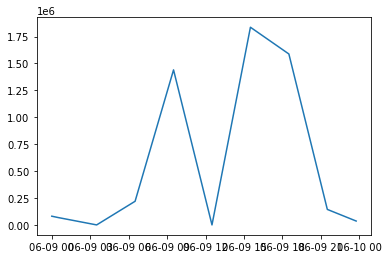

In [41]:
times =pd.date_range(start = "2020-06-09 00:00:00+00:00",end = "2020-06-09 23:45:00+00:00",freq='15min')
radiation = pd.DataFrame({'ghi': ghi},
                        index=times)
plt.plot(radiation)

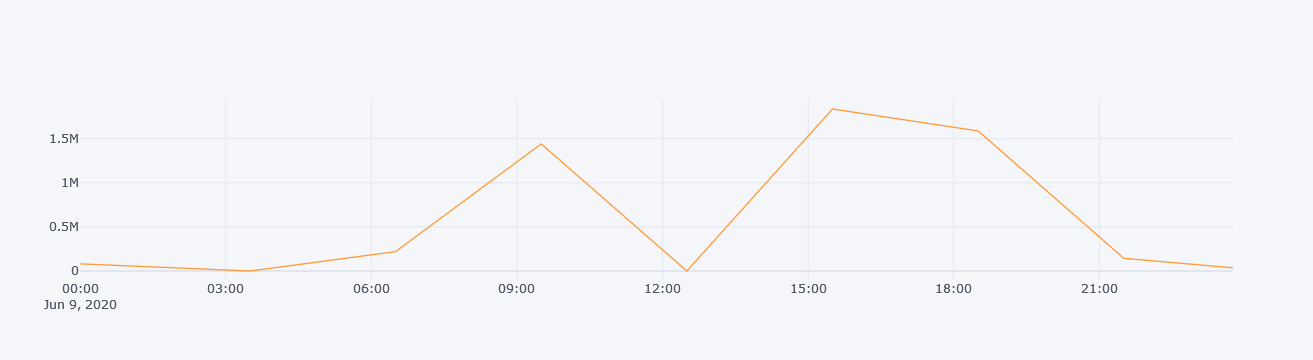

In [40]:
import cufflinks
cufflinks.go_offline()

radiation.iplot()

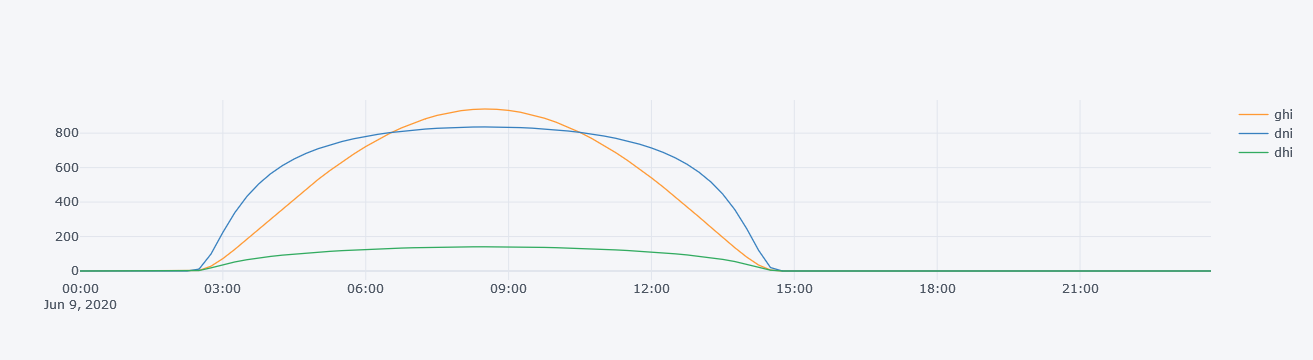

Location: 
  name: Oosterwolde
  latitude: 6
  longitude: 52
  altitude: 0
  tz: 0

In [62]:
# use DHI_calc for now
lon = 52#.98749605 
lat = 6#.288165514
solpos = pvlib.solarposition.get_solarposition(times, lat, lon)

loc = Location(lat, lon, 0, 0, 'Oosterwolde')

cs = loc.get_clearsky(times)###################

cs.iplot()
dhi_calc = cs.dhi
dni_calc = cs.dni
ghi_calc = cs.ghi

#piek bij 9uur is raar


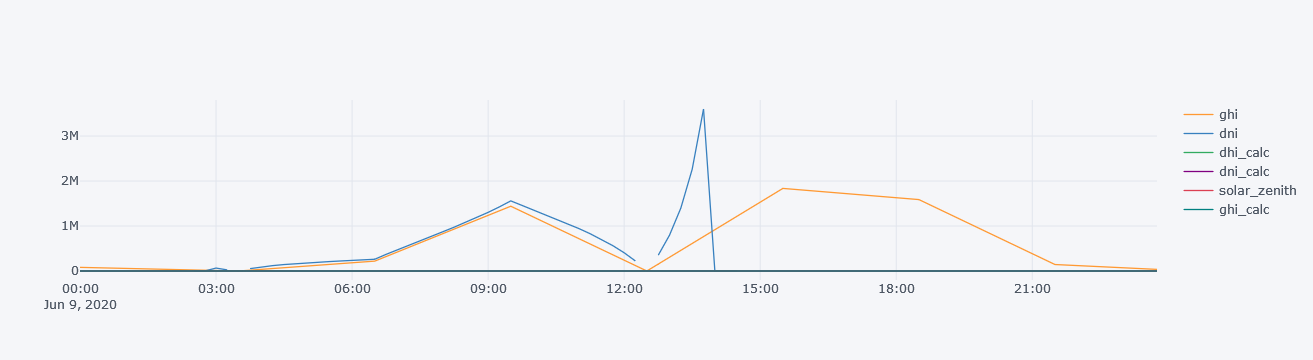

In [61]:
surface_tilt = tilt
surface_azimuth = azimuth
solar_zenith = solpos.apparent_zenith
solar_azimuth = solpos.azimuth

dni = pvlib.irradiance.dni(ghi, dhi_calc, solar_zenith, clearsky_dni=dni_calc, clearsky_tolerance=1.1, zenith_threshold_for_zero_dni=88.0, zenith_threshold_for_clearsky_limit=80.0)

radiation['dni'] = dni
radiation['dni_calc'] = dni_calc
radiation['ghi_calc'] = ghi_calc


radiation['dhi_calc'] = dhi_calc
radiation['solar_zenith'] = solar_zenith

radiation.iplot()
def get_Global_tilted_irridiance():
    return
#waarom is de meeting zo veel groter dan de berekende waarde?